# Андреев А.В ИУ5-25М

# Рубежный контроль №2

Задание: Для одного из алгоритмов временных различий, реализованных Вами в соответствующей лабораторная работе: SARSA
осуществите подбор гиперпараметров. Критерием оптимизации должна являться суммарная награда.

In [3]:
! pip install gymnasium
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from tqdm import tqdm
import matplotlib
# matplotlib.use('TkAgg')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install pygame 

import os
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((640,480))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Surface(640x480x32 SW)>

In [5]:
class BasicAgent:
    '''
    Базовый агент, от которого наследуются стратегии обучения
    '''

    # Наименование алгоритма
    ALGO_NAME = '---'

    def __init__(self, env, eps=0.1):
        # Среда
        self.env = env
        # Размерности Q-матрицы
        self.nA = env.action_space.n
        self.nS = env.observation_space.n
        #и сама матрица
        self.Q = np.zeros((self.nS, self.nA))
        # Значения коэффициентов
        # Порог выбора случайного действия
        self.eps=eps
        # Награды по эпизодам
        self.episodes_reward = []

    def print_q(self):
        print('Вывод Q-матрицы для алгоритма ', self.ALGO_NAME)
        print(self.Q)

    def get_state(self, state):
        '''
        Возвращает правильное начальное состояние
        '''
        if type(state) is tuple:
            # Если состояние вернулось с виде кортежа, то вернуть только номер состояния
            return state[0]
        else:
            return state

    def greedy(self, state):
        '''
        <<Жадное>> текущее действие
        Возвращает действие, соответствующее максимальному Q-значению
        для состояния state
        '''
        return np.argmax(self.Q[state])

    def make_action(self, state):
        '''
        Выбор действия агентом
        '''
        if np.random.uniform(0,1) < self.eps:

            # Если вероятность меньше eps
            # то выбирается случайное действие
            return self.env.action_space.sample()
        else:
            # иначе действие, соответствующее максимальному Q-значению
            return self.greedy(state)

    def draw_episodes_reward(self):
        # Построение графика наград по эпизодам
        fig, ax = plt.subplots(figsize = (15,10))
        y = self.episodes_reward
        x = list(range(1, len(y)+1))
        plt.plot(x, y, '-', linewidth=1, color='green')
        plt.title('Награды по эпизодам')
        plt.xlabel('Номер эпизода')
        plt.ylabel('Награда')
        plt.show()

    def learn():
        '''
        Реализация алгоритма обучения
        '''
        pass


In [6]:
class SARSA_Agent(BasicAgent):
    '''
    Реализация алгоритма SARSA
    '''
    # Наименование алгоритма
    ALGO_NAME = 'SARSA'

    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01

    def learn(self):
        '''
        Обучение на основе алгоритма SARSA
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Выбор действия
            action = self.make_action(state)

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):
                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                # Выполняем следующее действие
                next_action = self.make_action(next_state)

                # Правило обновления Q для SARSA
                self.Q[state][action] = self.Q[state][action] + self.lr * \
                    (rew + self.gamma * self.Q[next_state][next_action] - self.Q[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                action = next_action
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)


In [7]:
class QLearning_Agent(BasicAgent):
    '''
    Реализация алгоритма Q-Learning
    '''
    # Наименование алгоритма
    ALGO_NAME = 'Q-обучение'

    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01

    def learn(self):
        '''
        Обучение на основе алгоритма Q-Learning
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):
                # Выбор действия
                # В SARSA следующее действие выбиралось после шага в среде
                action = self.make_action(state)

                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                # Правило обновления Q для SARSA (для сравнения)
                # self.Q[state][action] = self.Q[state][action] + self.lr * \
                #     (rew + self.gamma * self.Q[next_state][next_action] - self.Q[state][action])

                # Правило обновления для Q-обучения
                self.Q[state][action] = self.Q[state][action] + self.lr * \
                    (rew + self.gamma * np.max(self.Q[next_state]) - self.Q[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)


In [8]:
class DoubleQLearning_Agent(BasicAgent):
    '''
    Реализация алгоритма Double Q-Learning
    '''
    # Наименование алгоритма
    ALGO_NAME = 'Двойное Q-обучение'

    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Вторая матрица
        self.Q2 = np.zeros((self.nS, self.nA))
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01


    def greedy(self, state):
        '''
        <<Жадное>> текущее действие
        Возвращает действие, соответствующее максимальному Q-значению
        для состояния state
        '''
        temp_q = self.Q[state] + self.Q2[state]
        return np.argmax(temp_q)

    def print_q(self):
        print(f"Вывод Q-матриц для алгоритма {self.ALGO_NAME}")
        print('Q1')
        print(self.Q)
        print('Q2')
        print(self.Q2)

    def learn(self):
        '''
        Обучение на основе алгоритма Double Q-Learning
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0

            # По мере заполнения Q-матрицы уменьшаем вероятность случайного выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay

            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):
                # Выбор действия
                # В SARSA следующее действие выбиралось после шага в среде
                action = self.make_action(state)

                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)

                if np.random.rand() < 0.5:
                    # Обновление первой таблицы
                    self.Q[state][action] = self.Q[state][action] + self.lr * \
                        (rew + self.gamma * self.Q2[next_state][np.argmax(self.Q[next_state])] - self.Q[state][action])
                else:
                    # Обновление второй таблицы
                    self.Q2[state][action] = self.Q2[state][action] + self.lr * \
                        (rew + self.gamma * self.Q[next_state][np.argmax(self.Q2[next_state])] - self.Q2[state][action])

                # Следующее состояние считаем текущим
                state = next_state
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)


In [9]:
def play_agent(agent):
    '''
    Проигрывание сессии для обученного агента
    '''
    env2 = gym.make('Taxi-v3', render_mode='human')
    state = env2.reset()[0]
    done = False
    while not done:
        action = agent.greedy(state)
        next_state, reward, terminated, truncated, _ = env2.step(action)
        env2.render()
        state = next_state
        if terminated or truncated:
            done = True


In [10]:
def plot_rewards(x, y):
    # Построение графика наград по эпизодам
    fig, ax = plt.subplots(figsize = (15,10))
    plt.plot(x, y, '-', linewidth=1, color='green')
    plt.title('Награды')
    plt.xlabel('Параметр')
    plt.ylabel('Награда')
    plt.show()

In [11]:
def bruteforce_sarsa():
    env = gym.make('Taxi-v3')
    rewards_eps = []
    rewards_lr = []
    rewards_gamma = []
    x = np.arange(0.1, 1, 0.1)
    for i in x:
        agent = SARSA_Agent(env,eps=i)
        agent.learn()
        agent.print_q()
        rewards_eps.append(np.asarray(agent.episodes_reward).sum())
    plot_rewards(x, rewards_eps)
    best_eps = x[rewards_eps.index(max(rewards_eps))]
    print(f"Best eps: {best_eps}")
    x = np.arange(0, 1, 0.03)
    for i in x:
        agent = SARSA_Agent(env, eps = best_eps, lr = i)
        agent.learn()
        agent.print_q()
        rewards_lr.append(np.asarray(agent.episodes_reward).sum())
    best_lr = x[rewards_lr.index(max(rewards_lr))]
    print(f"Best lr: {best_lr}")
    plot_rewards(x, rewards_lr)
    x = np.arange(0, 1, 0.03)
    for i in x:
        agent = SARSA_Agent(env, eps = best_eps, lr = best_lr, gamma = i)
        agent.learn()
        agent.print_q()
        rewards_gamma.append(np.asarray(agent.episodes_reward).sum())
    best_gamma = x[rewards_gamma.index(max(rewards_gamma))]
    print(f"Best gamma: {best_gamma}")
    plot_rewards(x, rewards_gamma)
    print(rewards_eps)
    print(rewards_lr)
    print(rewards_gamma)
    print(f"Best params: eps={best_eps}, lr={best_lr}, gamma={best_gamma}")

def run_sarsa():
    env = gym.make('Taxi-v3')
    agent = SARSA_Agent(env, eps=0.1, lr=0.33, gamma=0.99)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)

def run_q_learning():
    env = gym.make('Taxi-v3')
    agent = QLearning_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)

def run_double_q_learning():
    env = gym.make('Taxi-v3')
    agent = DoubleQLearning_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)


100%|██████████| 20000/20000 [00:16<00:00, 1232.55it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ 0.          0.          0.          0.          0.          0.        ]
 [-2.0653178  -3.17570924 -4.31915177 -2.12840343  7.16928295 -3.95961608]
 [-0.05364352  0.31592053  1.08554057 -0.89922633 12.98960843 -2.27627353]
 ...
 [-1.31089377  0.07919229 -1.32782099 -1.28302485 -2.75512488 -2.81028072]
 [-3.08908918 -2.37960685 -3.12597332 -3.15944558 -4.85511671 -4.76390607]
 [-0.19       -0.1998     -0.19       11.7131259  -1.9        -1.9098    ]]


100%|██████████| 20000/20000 [00:10<00:00, 1905.34it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ 0.          0.          0.          0.          0.          0.        ]
 [-2.85090812 -1.00761891 -2.08126713 -3.54633186  7.57698414 -7.62323696]
 [ 3.35851916  3.77681862 -1.30984206  5.31831358 12.60003423 -5.3504292 ]
 ...
 [-1.26406388  3.12616797 -1.17215994 -1.14348547 -3.56055977 -4.33347497]
 [-3.60013389 -3.53295236 -3.62028959  2.45501876 -4.67614703 -5.60937104]
 [-0.49297238 -0.3771604   0.55870002 16.467714   -0.72882518 -1.85256115]]


100%|██████████| 20000/20000 [00:11<00:00, 1681.61it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -4.7080306   -2.65036221  -4.5736499   -3.06781001   8.22416206
  -11.06067951]
 [  3.5600637    2.98044969  -1.84946047   3.85414991  12.95106146
   -2.74479717]
 ...
 [  4.25634034  14.42889227   4.52874402   2.08984931  -1.71992454
   -2.65771848]
 [ -4.77524768  -2.19278288  -4.6761771   -4.68326562 -10.08938984
  -10.25411288]
 [ -0.19        -0.1         -0.271       18.18315231   0.18896024
    0.46542901]]


100%|██████████| 20000/20000 [00:13<00:00, 1493.17it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -9.64242941  -2.60411981  -7.16388628  -7.25357462   7.7618744
  -14.02388057]
 [ -2.65923241   5.10052844   0.26678101   5.99479628  13.21768608
   -3.15051715]
 ...
 [  7.47926087  14.47363026   4.75477079   1.85170609  -3.5189531
   -3.3316133 ]
 [ -6.74704998  -5.85929491  -6.62979539  -0.33168048 -10.67279502
  -12.29825481]
 [  5.98165475   3.39849416   3.39013598  18.50811794  -0.51356034
    2.55814647]]


100%|██████████| 20000/20000 [00:15<00:00, 1314.87it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [-13.61633855  -7.31590173  -8.60510753  -5.55688377   7.19548985
  -16.60805179]
 [  0.34611312   6.87834541  -0.90998075   2.82645959  12.76385747
   -5.7417847 ]
 ...
 [ -3.32463267   7.47371542  -2.34625394  -5.36830557 -10.0929825
  -11.04523835]
 [-11.44878374  -7.9214876  -11.93911251 -11.70454417 -18.15202215
  -18.51767673]
 [ 14.61872659  10.77011538  14.34963898  18.6          5.83533552
    6.58780428]]


100%|██████████| 20000/20000 [00:17<00:00, 1118.21it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [-15.73009132  -7.76731418 -12.89575804  -9.80132532   7.62401726
  -17.972859  ]
 [ -1.79451257   1.81560178  -2.01200242   3.51420097  12.95953703
   -6.65451853]
 ...
 [ -6.79699856   7.89424411  -7.90037502  -8.33919693 -14.801525
  -12.15748921]
 [-19.65685564 -13.26036058 -18.40137387 -18.92048345 -26.15955464
  -25.3307094 ]
 [ 14.2787027    9.96910988  13.71137602  18.55647915   5.79889703
    2.77084372]]


100%|██████████| 20000/20000 [00:21<00:00, 946.76it/s] 


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [-14.7611965  -13.19549462 -12.8441653  -10.93512054   7.93997321
  -17.61959691]
 [ -0.55562407   3.45693157  -6.42786507   2.66025456  12.95172634
  -10.60010057]
 ...
 [ -9.93231544   1.71213386  -9.86642341 -13.46792659 -18.28880919
  -21.34000674]
 [-28.25037904 -24.68538843 -25.06930864  -2.17130348 -35.24871288
  -36.22438205]
 [ 13.95668362   8.41038065  12.4451885   18.38594926   1.57375901
    3.3113248 ]]


100%|██████████| 20000/20000 [00:25<00:00, 779.96it/s] 


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [-25.47400783 -16.02420567 -21.89011837 -19.67425547   7.56231612
  -24.0613698 ]
 [ -2.07126597  -1.44506649  -2.44923578  -1.60366615  12.86837852
   -6.8869436 ]
 ...
 [-16.66532153   3.45377216 -14.02707338 -16.42834816 -25.0229643
  -21.92520544]
 [-38.80651606 -34.44644036 -37.59637104 -10.05480925 -47.79307378
  -48.56958482]
 [ 14.83886174   9.59743403  14.23532669  18.57847784   1.01422233
    5.88852747]]


100%|██████████| 20000/20000 [00:31<00:00, 639.36it/s] 


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [-23.92892001  -9.89686051 -23.79496921 -10.52410245   8.05745249
  -26.46336845]
 [ -7.51340473   2.12180723  -4.36523308  -0.23230366  12.93920949
   -8.98409269]
 ...
 [-23.13651308   4.54369007 -27.85351997 -28.08158218 -35.5469432
  -35.3669142 ]
 [-52.21653368 -46.91200222 -49.69677312  -7.78060155 -62.63726124
  -56.37048046]
 [ 14.91220905  10.18028574  14.96527255  18.59997406   5.18705741
    4.42043214]]


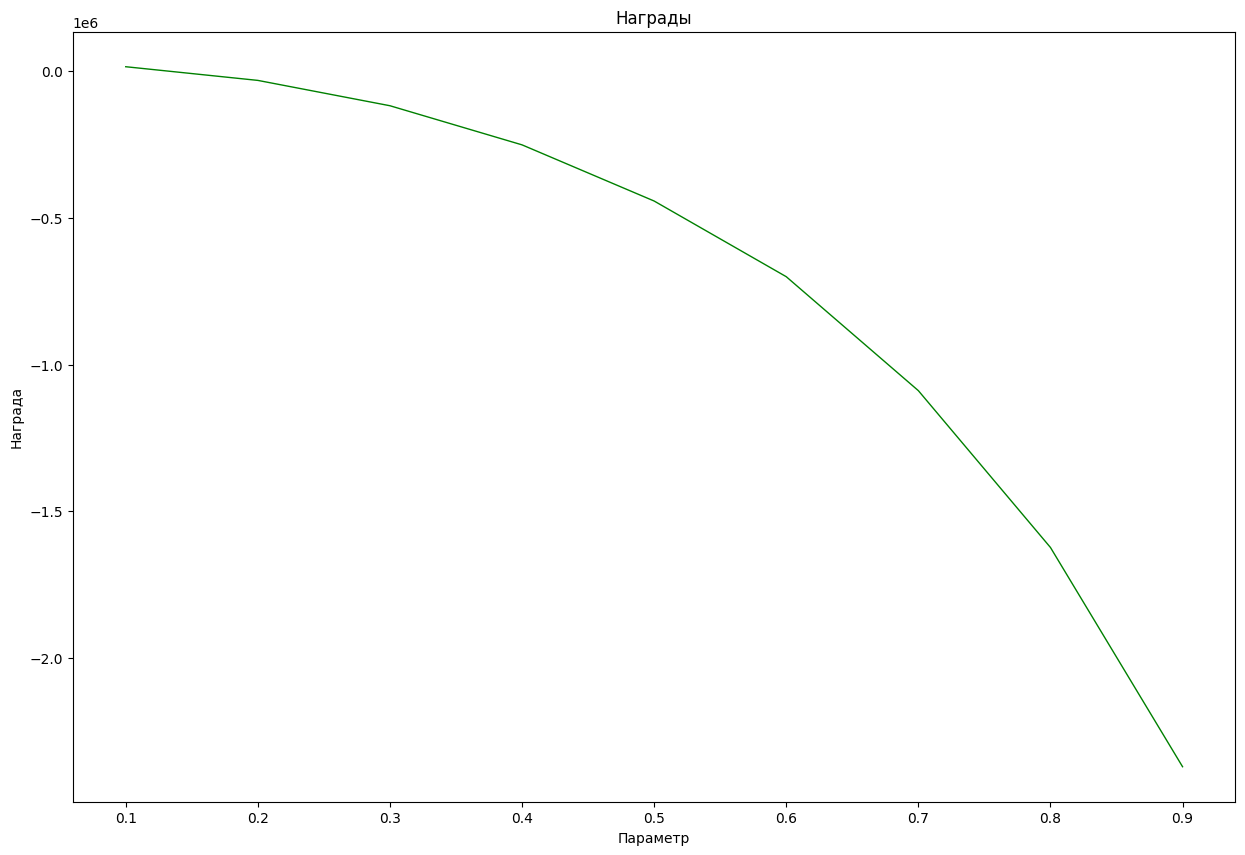

Best eps: 0.1


100%|██████████| 20000/20000 [01:52<00:00, 178.14it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


100%|██████████| 20000/20000 [00:14<00:00, 1382.18it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ 0.          0.          0.          0.          0.          0.        ]
 [-2.94243046 -3.32265338 -2.72638668 -2.79120162  7.42761092 -3.77704847]
 [-1.26578811 -0.79500515 -1.56467425 -1.14653755 12.49260625 -2.68283114]
 ...
 [-0.97204164 -0.55151727 -0.96928174 -0.96109899 -1.48114614 -1.16181852]
 [-2.4684537  -2.44875417 -2.4899303  -1.15341395 -2.86081739 -2.92649662]
 [-0.0591     -0.059982   -0.088209    3.88454258 -0.591      -0.591882  ]]


100%|██████████| 20000/20000 [00:11<00:00, 1679.73it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ 0.          0.          0.          0.          0.          0.        ]
 [-1.47292635 -3.50800804 -2.64247644 -2.97755883  7.32673937 -4.66255707]
 [-0.81773206  1.04241834 -0.34120541  0.31493984 12.37496907 -3.05602239]
 ...
 [-1.09343134  3.25139252 -1.16688282 -1.07026611 -1.7675294  -1.7383443 ]
 [-2.74683495 -2.7599477  -2.77662379 -2.74211968 -3.47284048 -3.44820291]
 [-0.1164     -0.119928   -0.1164      7.95999498 -1.164      -1.167528  ]]


100%|██████████| 20000/20000 [00:11<00:00, 1817.72it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ 0.          0.          0.          0.          0.          0.        ]
 [-3.36388679 -2.62968996 -2.14317573 -0.61789929  7.48139031 -4.35163392]
 [-0.39420116  0.48989804 -0.35875257  2.72256934 12.90856475 -2.17902206]
 ...
 [-1.54352508  3.65585923 -1.47568627 -1.43204658 -3.26321308 -2.56726394]
 [-2.70557272 -2.5739938  -2.65495283  1.92432873 -5.99045037 -3.63466602]
 [-0.1719     -0.1719     -0.26159058 10.69600309 -1.719      -1.726938  ]]


100%|██████████| 20000/20000 [00:09<00:00, 2009.98it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ 0.          0.          0.          0.          0.          0.        ]
 [-2.55971261 -1.26629875 -2.13846292  0.79189102  7.53607723 -5.65113371]
 [-0.48194973  1.38240642 -0.78342097  2.06689231 12.43253741 -1.45861389]
 ...
 [-1.24538735  1.20063796 -1.36131533 -1.37807567 -2.256      -2.270112  ]
 [-3.53703056 -3.41681219 -3.36514788 -3.41380734 -5.54639551 -5.54487863]
 [-0.34505856 -0.239712   -0.33264    10.98335537 -2.270112   -1.2       ]]


100%|██████████| 20000/20000 [00:10<00:00, 1938.13it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ 0.          0.          0.          0.          0.          0.        ]
 [-1.43856507  1.62557464 -0.59692553 -2.07255358  8.22640277 -4.06461745]
 [-0.80328562  2.93115364 -0.18794924  4.09545173 12.56713104 -0.2096229 ]
 ...
 [-2.25070992 -0.53434721 -2.20116917 -2.28491106 -4.28952991 -2.79705   ]
 [-3.38744733 -3.27189728 -3.2937062  -1.37482952 -5.53580279 -4.14338732]
 [14.03151508  9.26291956 11.51334346 18.6         7.11730379  6.2579722 ]]


100%|██████████| 20000/20000 [00:09<00:00, 2082.63it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ 0.          0.          0.          0.          0.          0.        ]
 [-1.34604969  0.86877021 -1.54788842  0.23606428  8.29797282 -5.29008303]
 [ 3.07515805  3.2707949   0.2693597   0.79209997 13.09750235 -1.90271919]
 ...
 [-1.29927585 10.4107475  -1.52271744 -1.37066783 -3.43046421 -3.307752  ]
 [-3.8252042  -3.52377529 -3.76236609 -3.78827461 -7.77931098 -5.10527006]
 [-0.50642064 -0.33779708 -0.50642064 18.10378312 -1.8        -3.307752  ]]


100%|██████████| 20000/20000 [00:09<00:00, 2075.22it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.33246707 -2.72498335 -0.74819163  2.01921373  8.08190773 -6.00701219]
 [ 5.60502435  0.65073083 -0.75733769  6.00798459 12.22735014 -0.02271275]
 ...
 [-1.8569533  -1.71535458 -1.88157649  4.94238574 -3.759      -3.802218  ]
 [-3.18711066 -3.17918322 -3.11676055  4.57658505 -8.1417228  -3.802218  ]
 [-0.74897398 10.26902132 -0.75786825 -0.45326022 -2.1        -3.802218  ]]


100%|██████████| 20000/20000 [00:09<00:00, 2047.73it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -1.06782064  -2.14628494  -0.36576561  -0.89516459   8.05819573
   -2.71280391]
 [  4.53673722   9.11022914   2.64549124   8.70897834  12.72196709
   -2.70184322]
 ...
 [ -1.61300242  -1.57638161  -1.68482246  -1.87611346  -4.32334848
   -4.280448  ]
 [ -4.70311264  -3.58437327  -3.88772077   0.7505662  -10.13682481
   -7.81840132]
 [ -0.4224      -0.4224      -0.4224      17.44892867  -4.224
   -4.280448  ]]


100%|██████████| 20000/20000 [00:09<00:00, 2067.27it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -0.1393985    3.08429238  -2.49339881  -2.4312978    8.19271203
   -4.63844644]
 [  2.04721798   3.54545837  -0.65712608  -0.2622506   10.55401365
   -2.18792602]
 ...
 [ -2.48497063   2.16228104  -2.17187969  -2.19098829  -4.742442
   -4.742442  ]
 [ -4.88771252  -3.70580168  -4.70193439   1.41146012  -8.43965329
  -10.55775304]
 [ -1.74185327  -0.73457766  -0.538542    17.31146541  -6.23342466
   -4.742442  ]]


100%|██████████| 20000/20000 [00:09<00:00, 2052.94it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [  0.66582256  -1.52381354   2.44347888  -4.9498986    6.93004589
   -6.469217  ]
 [ -0.73364225   4.36211435   0.51938884   7.81713848  13.26329349
   -0.47795948]
 ...
 [ -2.86252852  -0.99963505  -4.60674725  -2.64840129  -8.53496052
   -7.38787378]
 [ -5.33711691  -4.20635663  -4.55534872   2.69300311  -7.89162819
  -10.26509532]
 [ -1.014798    -0.5982      -1.014798    18.41369633  -5.1
   -5.1882    ]]


100%|██████████| 20000/20000 [00:09<00:00, 2091.26it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -5.8894122    1.7551283    3.05084551   3.08452877   8.12220943
   -4.11426821]
 [ -0.59571464   8.57403714   3.43008822   9.67075448  12.92739825
   -0.37970845]
 ...
 [  8.39585603  13.85785015  10.13808289  -2.99363549  -1.44295704
    1.49414068]
 [ -5.94571858  -3.59645707  -6.02625028  -6.06626814 -10.96737878
  -11.07948487]
 [ -1.09612578  -0.72932574  -1.09612578  18.36610377  -5.511
   -7.24209948]]


100%|██████████| 20000/20000 [00:09<00:00, 2220.53it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ 0.          0.          0.          0.          0.          0.        ]
 [-1.00156305  2.84660869 -4.09956892 -0.20058844  7.89358513 -4.9816296 ]
 [ 4.39180725  8.76579819  6.38731519 -4.57471991 13.24366456  0.02945933]
 ...
 [ 7.28372005 14.53596343  8.61993151  4.78316867  2.81368545 -1.19357144]
 [-7.4775459  -2.81280718 -7.64145347 -7.58574634 -8.25679046 -9.41460118]
 [ 5.45082972 -0.79869312 -1.21863698 18.59979882  4.15696776 -0.89776512]]


100%|██████████| 20000/20000 [00:08<00:00, 2224.80it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [  3.17315519   2.99498014  -3.66378919   2.48033503   8.07447803
   -6.428058  ]
 [  6.65563376  -4.39563576   1.83954158   6.49830137  13.00333765
    1.3059473 ]
 ...
 [ -4.52521841   4.91795657  -3.38430004  -4.38974366  -8.87189036
   -6.428058  ]
 [ -7.37137063  -6.57083938  -7.64381155  -1.2513493  -12.05780112
  -12.65212782]
 [ -1.24791483  -0.86788338  -1.24791483  18.59958207  -7.97017338
   -4.049058  ]]


100%|██████████| 20000/20000 [00:09<00:00, 2098.56it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ 0.          0.          0.          0.          0.          0.        ]
 [-0.04188206  2.74269665  2.11430476  2.34297871  8.25037623 -3.62254559]
 [ 5.67736909  3.08553092  6.54481934  4.79165824 13.27368939 -0.45944411]
 ...
 [-2.6769096  11.83340295 -3.77663254 -2.45669884 -8.59153044 -6.808872  ]
 [ 2.32463341  9.30553565  2.69844754  1.90979509 -2.74338169 -1.77925526]
 [-1.05970704 -0.836472   -1.3183927  18.55186673 -6.636      -6.9672919 ]]


100%|██████████| 20000/20000 [00:09<00:00, 2097.93it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ 0.          0.          0.          0.          0.          0.        ]
 [ 2.56943486  3.20900941 -0.16303989 -1.3517198   8.09460148 -6.23216013]
 [ 4.07087487  0.312874   -2.58537462  0.63106283  9.57156488 -2.22160505]
 ...
 [-4.80675224 -5.0116174  -4.68476971  8.1723764  -6.975      -9.20511191]
 [-6.07857676 -5.86982284 -5.91809295  5.83095962 -7.391745   -7.17345   ]
 [-0.6975     -0.89595    -0.6975     18.47164843 -8.5347     -7.17345   ]]


100%|██████████| 20000/20000 [00:09<00:00, 2067.92it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.10900746e-02  3.88540944e+00  3.44842700e+00  2.68535093e+00
   8.17388240e+00 -4.56018261e+00]
 [ 1.13318966e+00  6.24925652e+00  6.75564315e+00 -3.87797737e+00
   1.30016213e+01  1.50026136e+00]
 ...
 [ 1.63736074e+00  1.10471757e+01 -1.09726612e+00 -1.32887737e+00
  -5.47108717e+00 -2.20975676e+00]
 [-7.49057063e+00 -7.57271850e+00 -8.24149972e+00 -7.58194067e+00
  -1.27748090e+01 -9.05453568e+00]
 [-7.29600000e-01 -7.29600000e-01 -7.29600000e-01  1.83791303e+01
  -7.29600000e+00 -7.52179200e+00]]


100%|██████████| 20000/20000 [00:09<00:00, 2015.21it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -0.4868179   -0.81326701  -4.18938058  -0.25923475   8.22036392
   -5.45179177]
 [  3.41033815   3.98346888  -3.87181798   8.06621716  13.27445578
    1.95142286]
 ...
 [  2.16502634  12.00896658   2.20162304   3.86188584  -4.10350861
   -0.36664852]
 [ -8.1963374    6.81558783  -7.76460449  -7.74077257 -10.58607763
   -7.853898  ]
 [ -0.7599      -0.51        -0.7599      18.59967855  -7.599
   -7.853898  ]]


100%|██████████| 20000/20000 [00:09<00:00, 2136.96it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ 0.          0.          0.          0.          0.          0.        ]
 [-1.63380329 -3.7447806   1.97469382  1.33650091  8.3415535  -4.5420246 ]
 [ 2.44272134  4.18162922  3.81062401  8.0326196  13.22858022 -2.94735677]
 ...
 [-3.35354324  7.59027758 -2.99241639  0.67760577 -1.94725244 -1.31696986]
 [-5.85262335 -2.57313247 -6.29231555 -9.43719322 -7.884      -8.169768  ]
 [-0.7884     -1.074168   -1.31988528 18.59626511 -7.884      -8.169768  ]]


100%|██████████| 20000/20000 [00:09<00:00, 2116.08it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -4.01405289  -5.27400231   0.82125214   2.00606344   8.26918671
  -12.8203091 ]
 [  0.49188012   3.27346914   0.40310292   7.86877667  13.27443868
    0.76951439]
 ...
 [ -4.88369913  -5.52568866  -5.18515267   9.45812903 -12.41955479
   -8.469402  ]
 [-10.00975662  -2.1210581   -9.92301026  -9.77808248 -16.90889942
  -16.32524297]
 [ -0.920493    -1.69058008  -0.8151      18.5982185   -5.7
   -8.469402  ]]


100%|██████████| 20000/20000 [00:09<00:00, 2030.52it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -1.61948005   0.79309652  -1.77821833  -5.73844678   8.3623431
  -14.79210964]
 [  0.08674937  -0.55436965  -0.64996295   0.07366905  13.20813841
   -6.09918152]
 ...
 [ -5.13754604  -4.97528511  -5.96819405   4.72201811  -8.4
  -11.83689337]
 [-11.72850904  -9.75353663  -9.66653724  -4.87761778 -11.19041276
  -15.1878398 ]
 [ 16.36207102   4.67791504  12.32795601  18.6          7.31738888
   -8.7528    ]]


100%|██████████| 20000/20000 [00:10<00:00, 1996.34it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -0.03553697  -4.20898298  -3.84779444  -3.55202386   7.7402295
  -11.24457702]
 [  0.82144083   0.21044974  -9.17712283   0.33489984  13.26879453
  -13.48278485]
 ...
 [ -8.09045852  -8.16952292  -7.56666099   4.6935803  -12.46801555
   -9.019962  ]
 [ -8.62264621  -8.47204262  -8.96748529   2.88528605  -8.631
   -9.019962  ]
 [ -1.71130117  -1.39597794  -1.95144631  18.59741999  -8.631
   -9.019962  ]]


100%|██████████| 20000/20000 [00:10<00:00, 1932.59it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -7.87216505   1.08139839  -7.48247537  -5.25298736   7.63781082
  -14.88858438]
 [  3.1997674    7.18759213   2.36522323  -8.72090257  13.27445578
   -3.9479793 ]
 ...
 [ -6.86900689  -2.60702455  -5.40093153   2.51279046  -9.86818492
   -9.270888  ]
 [-15.25177877 -20.0992538  -15.48969151 -12.80890821 -19.26134618
  -22.26134214]
 [ 11.069784    -1.311288    -0.8844      18.6          6.46439622
   -9.270888  ]]


100%|██████████| 20000/20000 [00:10<00:00, 1857.08it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -9.6973718   -0.78514132  -8.81864383  -9.13915287  -0.45291216
   -5.53449773]
 [ -1.296574    -2.8026423  -10.13832741   4.2433225   10.76813637
   -9.8026956 ]
 ...
 [ -4.28420113  14.56510846   6.59989587  -1.88710392   2.99399846
   -0.75588355]
 [ -9.66971027   3.86954508  -8.37128252  -7.24486813 -14.07471512
   -9.505578  ]
 [  9.8909282   12.45185646  11.273234    18.6          7.18464252
    6.69877123]]


100%|██████████| 20000/20000 [00:10<00:00, 1868.24it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [-12.55553617  -6.70689338  -7.68342404  -9.6938349    4.16965406
  -14.1150603 ]
 [ -4.16300965  -4.524759    -5.92151416  -4.43571667  13.27445578
  -10.94602673]
 ...
 [  9.2068834   12.00896666  -9.17910492  -9.03430781 -14.38889792
   -2.34541876]
 [-17.52722257   8.93242827  -0.06683001 -17.40092859 -19.02999099
  -21.49153492]
 [ -1.68396411  10.48915384   5.24789726  18.6         -7.2
   -9.724032  ]]


100%|██████████| 20000/20000 [00:10<00:00, 1840.25it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [-11.55697458 -10.9918707  -11.06615848 -11.16071188   5.81760477
  -15.95423635]
 [ -7.31536949  -2.74065097  -6.84303985  -7.0954345   10.6056313
  -11.71280819]
 ...
 [ -9.49906491  -9.47699921  -5.03118628  -3.07395817  -8.0033174
   -9.92625   ]
 [-16.60428875 -14.23262811 -16.77321911   4.1012266  -23.28075008
  -20.74874578]
 [ 12.29320723  -2.86517061  -2.29704375  18.6          3.82725
    3.6894375 ]]


100%|██████████| 20000/20000 [00:11<00:00, 1678.53it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [-15.55018908   2.1221897  -11.37173018 -15.25254282   8.31716644
   -5.67762835]
 [ -8.8750762   -4.88098421 -11.52441579  -8.9028787    7.14310985
  -17.23831887]
 ...
 [ -4.69253966  -4.57865975  -8.27710879  -5.13865577  -9.23789115
   -6.03332197]
 [-11.36028352   9.21134903 -15.65015095 -13.21798501  -3.8548831
  -17.1793144 ]
 [ -2.31812087  -1.547832     8.84075195  18.6          4.54180917
  -10.112232  ]]


100%|██████████| 20000/20000 [00:11<00:00, 1681.20it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [-16.8562588  -16.43804981 -16.58336894 -16.7202214    7.22798506
  -17.78271054]
 [-14.99511383   6.45522804 -15.34535579   7.26857971  13.10648945
  -20.86352676]
 ...
 [-10.68542882  14.5657712   -9.00509354  -6.43887054 -19.30399862
    0.90726065]
 [ -7.33987717   5.72249168  -9.48002365 -26.81754845 -15.79074944
  -25.95925576]
 [ -6.38803108  13.99918481  -6.256182    -6.30692055 -10.574388
  -17.2904382 ]]


100%|██████████| 20000/20000 [00:11<00:00, 1681.74it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [-14.73027312 -18.61200962 -14.28808006 -18.96116911   8.36160622
   -5.82164409]
 [-13.9280232  -10.80800491  -6.43766307  -7.28570013  13.27443799
    0.81702693]
 ...
 [-13.66116369 -17.87211903   2.32934457  -3.90415641 -15.65557004
  -21.98456441]
 [-18.74668976  -1.93519492 -18.88361592 -19.00296897 -23.4137142
  -24.44860164]
 [ 13.39730318  -6.33015146  -6.13721841  18.6         -9.744
    5.14560103]]


100%|██████████| 20000/20000 [00:12<00:00, 1542.16it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [-30.02067922 -23.00494025 -25.60507256 -22.91296407   4.83596031
  -27.41839924]
 [-17.77260534   0.66431503 -22.53833606 -18.30075003  13.26720881
  -22.21434772]
 ...
 [-17.06301284 -14.87548525 -18.01550685 -12.09363366 -19.45718677
  -15.57332274]
 [-23.25273312 -24.13536782 -23.60151002 -23.28408236 -30.75859161
  -27.61234973]
 [  0.53408182   0.19787149  14.860557    18.6          6.87839436
    5.78390094]]


100%|██████████| 20000/20000 [00:14<00:00, 1349.48it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [-24.17483124   3.71218136 -23.81568409 -24.13417458   8.3613968
  -32.76174696]
 [-15.45917609 -17.46607799  -9.2334153  -23.01479309  13.27445578
  -17.18646039]
 ...
 [-16.12114702 -13.52775924  -7.99074423  -8.27521973  -9.47428322
   -9.67848846]
 [-28.2392984  -34.71958041 -28.46978973 -28.50954202 -35.47093473
  -31.84303641]
 [ 14.5218101    3.36560202  -7.73989318  18.6          8.20560687
    8.22561061]]


100%|██████████| 20000/20000 [00:16<00:00, 1248.47it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [-35.43794403 -23.51655957 -23.10685636 -34.62174743   1.83097288
  -40.58862548]
 [-29.40912023 -29.23443899 -30.83598935 -28.98549706  13.27445578
  -32.23047126]
 ...
 [-20.70680972 -25.62041256 -20.32531019   4.45197162 -29.5475183
   -6.29684444]
 [-33.43383117 -36.79589448 -33.61651007 -33.08817434 -38.11383687
  -40.31620276]
 [ 10.82003339   7.79212904  16.71505012  18.6          6.88879471
    8.22147386]]


100%|██████████| 20000/20000 [00:19<00:00, 1005.01it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [-34.71751097 -34.78791916 -34.54179137 -35.87764785   8.36234335
  -42.11711322]
 [ -4.85646923 -24.07349832 -34.92948376 -30.10498211  13.27445561
    1.51892305]
 ...
 [-26.12244418  14.56577108 -25.83277325 -25.83862933 -27.99426612
  -25.97061321]
 [-38.35058775 -38.12108028 -38.56121663 -38.35211623 -44.75215475
  -45.49381175]
 [ -1.96604763   7.46563544   8.18658421   8.81568     -9.6
  -10.887168  ]]


100%|██████████| 20000/20000 [00:30<00:00, 658.06it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [-41.37534603 -41.19063871 -41.56628025 -41.3198229    6.82856599
  -42.96721454]
 [-16.65777324 -43.25356167 -43.23813929 -43.59970841  13.27445578
  -39.21842023]
 ...
 [-22.53564393  14.5657712  -22.83335569 -22.76942824 -27.42677246
  -23.56707743]
 [-54.04857307 -57.04799626 -59.92053797 -54.80034905 -58.08048767
  -59.04303274]
 [  7.34882523   7.02889906   7.35074334  18.6          8.00848906
    8.22608125]]
Best lr: 0.32999999999999996


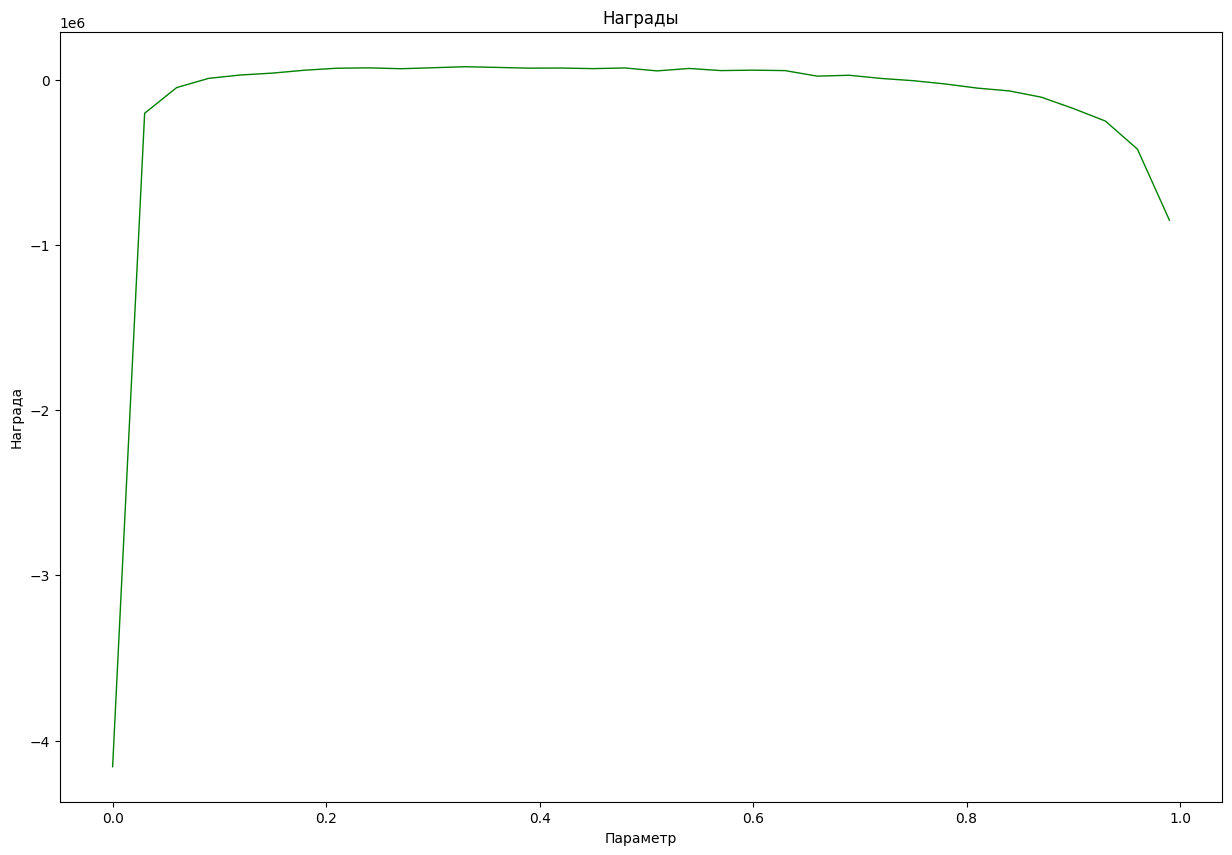

100%|██████████| 20000/20000 [01:49<00:00, 183.30it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ 0.          0.          0.          0.          0.          0.        ]
 [-1.         -1.         -1.         -1.         -1.         -9.39392884]
 [-1.         -1.         -1.         -1.         -1.         -9.39392884]
 ...
 [-1.         -1.         -1.         -1.         -9.39392884 -5.511     ]
 [-1.         -1.         -1.         -1.         -9.39392884 -9.59393232]
 [-0.99181728 -0.99181728 -0.99181728 -0.99181728 -5.511      -5.511     ]]


100%|██████████| 20000/20000 [01:28<00:00, 226.44it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -1.09055189  -1.09064277  -1.09047845  -1.09062659  -1.03092784
  -10.03124391]
 [ -1.11927019  -1.12003788  -1.09008257  -1.12003698  -1.03092736
  -10.0320032 ]
 ...
 [ -1.11100639  -1.03094595  -1.0428383   -1.11990908  -9.84733881
   -8.00339926]
 [ -1.11996443  -1.11960228  -1.11992467  -1.03097154 -10.02722814
  -10.0237954 ]
 [ -0.5511      -0.55911041  -0.5511      -0.39827591  -6.99499013
   -7.03285897]]


100%|██████████| 20000/20000 [01:22<00:00, 243.31it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -1.09900313  -1.18324669  -1.09960489  -1.08865278  -1.06387353
  -10.0648245 ]
 [ -1.09976233  -1.14380484  -1.09430553  -1.11746047  -1.06381369
  -10.06352337]
 ...
 [ -1.10479765  -1.06382849  -1.11745041  -1.09430739  -9.87828896
   -8.72223143]
 [ -1.23690235  -1.14334938  -1.17814228  -1.0639549   -9.98665571
  -10.04899795]
 [ -0.81273258  -0.56201178  -0.557634     0.19776233  -7.00328178
   -6.99300765]]


100%|██████████| 20000/20000 [01:25<00:00, 233.72it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -1.36628641  -1.21903502  -1.09890551  -1.21919906  -1.3662129
  -10.10030063]
 [ -1.27805731  -1.27824712  -1.21900172  -1.36625787  -1.09890112
  -10.1006806 ]
 ...
 [ -1.27490527  -1.27454343  -1.36290375  -1.10247112  -9.69312385
  -10.05252198]
 [ -1.3662922   -1.36626519  -1.36634773  -1.11545119 -10.10368238
  -10.1101495 ]
 [ -0.8258228   -0.72701489  -0.85973631   0.8         -5.511
   -5.520801  ]]


100%|██████████| 20000/20000 [01:26<00:00, 231.98it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -1.37549495  -1.24398824  -1.49216759  -1.13636364  -1.18460855
  -10.14049956]
 [ -1.4940964   -1.49505007  -1.20765062  -1.37831233  -1.1358392
  -10.18138062]
 ...
 [ -1.39186153  -1.23193974  -1.15691452  -1.13997308  -8.06002514
   -9.52079438]
 [ -1.24163773  -1.13637794  -1.48169257  -1.49284452  -9.74206715
   -9.94990574]
 [ -0.5511      -0.33        -0.70195514   0.98393577  -5.511
   -5.53282356]]


100%|██████████| 20000/20000 [01:17<00:00, 258.22it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -1.31039283  -1.62258126  -1.3765825   -1.62288925  -1.17647345
  -10.18453588]
 [ -1.61780309  -1.60952622  -1.62022888  -1.47493077  -1.17559005
  -10.18276713]
 ...
 [ -1.19069803  -1.17315215  -1.36905204  -1.18261783  -9.23557977
   -5.527335  ]
 [ -1.57611449  -1.60918219  -1.61716762  -1.17649148  -9.90606049
  -10.11813568]
 [ -0.84404547  -0.75112231  -0.84404547   2.          -5.527335
   -6.87639225]]


100%|██████████| 20000/20000 [01:15<00:00, 264.85it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -1.58017761  -1.75550628  -1.57826798  -1.7563284   -1.21984947
  -10.25878294]
 [ -1.75240849  -1.4603668   -1.73791932  -1.75407016  -1.21550276
  -10.22543857]
 ...
 [ -1.56742435  -1.4783719   -1.66962624  -1.22165433  -9.26779967
   -9.27424627]
 [ -1.74759309  -1.44246756  -1.55424588  -1.21963201 -10.13820211
  -10.17665641]
 [ -0.85315681  -0.570702    -0.86390062   2.14224069  -7.02510534
   -5.530602  ]]


100%|██████████| 20000/20000 [01:20<00:00, 249.58it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -1.54611156  -1.89248618  -1.54643426  -1.89299317  -1.26582536
  -10.30814392]
 [ -1.27252951  -1.54627832  -1.34891612  -1.88902201  -1.67762356
  -10.2647457 ]
 ...
 [ -1.84525525  -1.22446777  -1.4754524   -1.88952114  -9.85432122
   -9.32984112]
 [ -1.45364336  -1.68565463  -1.39338868  -1.27085568 -10.2914005
  -10.20805337]
 [ -0.5511      -0.573969    -0.34545457   3.2         -5.511
   -5.533869  ]]


100%|██████████| 20000/20000 [01:21<00:00, 243.98it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -1.79598721  -2.03116265  -1.79302722  -1.79461204  -1.31774809
  -10.36311832]
 [ -1.91864784  -1.64151815  -1.60496918  -2.02027941  -1.29969397
  -10.32192863]
 ...
 [ -1.57545398  -1.25604941  -1.85639892  -1.77188746  -9.91502417
   -8.87777388]
 [ -2.03181598  -1.63699006  -1.64282121  -1.31578947 -10.41103476
  -10.35122675]
 [ -0.5511      -0.75117478  -0.699237     3.79999998  -7.04774957
   -5.537136  ]]


100%|██████████| 20000/20000 [01:19<00:00, 252.20it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -2.17846943  -2.17201541  -1.91158085  -1.9076157   -1.37786505
  -10.40587129]
 [ -1.91351277  -1.90177127  -1.88898841  -1.9026763   -1.33923434
  -10.38751154]
 ...
 [ -2.0448302   -1.36194097  -2.08959337  -2.17195927  -9.77824579
  -10.10533927]
 [ -2.17467736  -1.37111007  -1.91351168  -1.91709625 -10.41657585
  -10.18540108]
 [ -0.5511      -0.580503    -0.5511       4.13556873  -5.511
   -5.540403  ]]


100%|██████████| 20000/20000 [01:11<00:00, 279.95it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -1.42878885  -1.83484372  -1.60875472  -1.83567556  -2.32322628
  -10.44342637]
 [ -2.31965393  -1.61125019  -2.02544126  -1.82953497  -1.37848316
  -10.44720336]
 ...
 [ -1.59748692  -1.78710232  -1.82224378  -1.45593223  -9.77011072
  -10.37273202]
 [ -2.32021884  -2.03382548  -2.32308482  -1.44049775 -10.50893044
  -10.46089485]
 [ -0.731907    -0.72131506  -0.80302665   4.9999994   -5.511
   -5.5655589 ]]


100%|██████████| 20000/20000 [01:21<00:00, 244.81it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -1.70843155  -2.16262193  -2.15887351  -2.52386595  -2.47766366
  -10.87932553]
 [ -2.16127316  -2.47323508  -1.55759476  -2.47339855  -2.08932629
  -10.53959111]
 ...
 [ -1.94784752  -1.49152555  -1.76060979  -1.49762683  -8.27245687
   -8.32928535]
 [ -1.78604072  -2.14111931  -2.48685368  -1.53700678 -10.68716091
  -10.49543568]
 [ -0.699237    -0.587037    -0.61111479   5.6         -5.511
   -6.99819179]]


100%|██████████| 20000/20000 [01:12<00:00, 275.47it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -2.04383281  -2.04365683  -1.58322633  -2.62937268  -2.63499128
  -10.60145511]
 [ -2.63057069  -2.63107856  -2.28330346  -2.65898037  -1.54563526
  -10.6957488 ]
 ...
 [ -2.03158159  -2.01669435  -2.01166712  -1.57571064  -9.04626331
   -8.31211512]
 [ -2.64307309  -1.55874674  -2.64145567  -2.64351999 -10.74453693
  -10.66854412]
 [ -0.5511      -0.33        -0.5511       5.642194    -3.339204
    0.        ]]


100%|██████████| 20000/20000 [01:11<00:00, 277.96it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -2.8035105   -2.45333651  -2.74598245  -2.41769071  -1.65316828
  -10.71967622]
 [ -2.42258834  -2.42487972  -2.44066446  -2.00036804  -1.60976494
  -10.80531033]
 ...
 [ -2.10848859  -1.14110221  -2.48976716  -1.78475373  -8.96099329
   -9.51228227]
 [ -2.32703791  -1.63946681  -2.7156525   -2.80351383 -10.33090182
  -10.4188315 ]
 [ -0.91693616  -0.593571    -0.91693616   6.50064032  -5.511
   -5.553471  ]]


100%|██████████| 20000/20000 [01:04<00:00, 310.69it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -2.29388098  -2.56071399  -1.98233703  -2.12284142  -1.7252709
  -10.73853395]
 [ -2.17381568  -1.9686421   -2.40533308  -2.47679197  -1.44022426
  -10.49818439]
 ...
 [ -2.22292701  -1.0481583   -2.3155029   -1.72413796  -5.511
  -10.06720292]
 [ -2.10460951  -2.93733952  -2.98074325  -1.74423009 -10.75879501
  -11.00987812]
 [  0.3263833   -0.60127      0.2952508    7.39859938  -3.3
   -6.2915828 ]]


100%|██████████| 20000/20000 [01:17<00:00, 259.04it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -2.71832832  -1.81818187  -2.01492521  -2.26661468  -2.21773957
  -10.93659118]
 [ -1.96793414  -2.13838198  -2.81380033  -2.66410783  -1.42904541
  -10.83044109]
 ...
 [ -2.89413894  -1.05206061  -2.89501244  -2.4901959   -9.66873692
   -9.68691354]
 [ -2.32750409  -1.78151188  -3.11937603  -2.4338251  -10.7702307
  -10.75121847]
 [ -0.5511      -0.5511      -0.5511       6.97780823  -5.511
   -5.560005  ]]


100%|██████████| 20000/20000 [01:02<00:00, 319.42it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -1.93162363  -2.1180591   -3.51132863  -2.07671275  -2.36671147
  -10.97250103]
 [ -2.01685013  -2.02423548  -2.54106609  -1.96290665  -1.38068538
  -10.83188567]
 ...
 [ -2.98363826  -1.69603162  -2.2952972   -3.29535867  -8.21581714
   -9.37919969]
 [ -2.86452733  -3.23556059  -2.79637057  -1.93678602  -7.25014064
  -10.40910258]
 [ -0.5511      -0.603372    -0.5511       8.24474205  -5.511
   -5.563272  ]]


100%|██████████| 20000/20000 [01:00<00:00, 327.95it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -3.5273263   -3.12740098  -2.49849387  -3.06459982  -2.00272812
  -11.14120994]
 [ -2.04794913  -2.36407414  -3.10044418  -3.06695722  -1.28278282
  -11.14415718]
 ...
 [ -1.74890214  -0.87314805  -1.79866552  -1.77730897  -8.17376472
   -7.16189773]
 [ -2.80535455  -2.04081758  -2.53843071  -3.58867463 -10.04184709
  -10.82919809]
 [  2.36062363  -0.65319734   0.67707387   9.2         -5.44076766
   -5.48122113]]


100%|██████████| 20000/20000 [01:02<00:00, 319.82it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -3.81991519  -3.80153523  -3.36170412  -3.57492383  -2.12317394
  -11.21863915]
 [ -2.74292459  -2.30312349  -2.62980683  -2.17373596  -1.20606467
   -8.72980095]
 ...
 [ -1.80764605  -0.32329193  -1.86525041  -1.84814669  -8.9554267
   -5.569806  ]
 [ -3.80685569  -2.37924879  -3.00009856  -3.25779782 -11.02773785
  -10.95425695]
 [  0.83096506  -0.82384103  -0.5511       8.98728496  -5.511
   -5.569806  ]]


100%|██████████| 20000/20000 [01:01<00:00, 326.19it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -2.8400965   -2.53906205  -2.74297705  -2.72702194  -2.20113913
  -11.33892848]
 [ -2.983443    -2.62373877  -3.0918208   -2.67693946  -0.98395829
  -10.783316  ]
 ...
 [ -2.5211715    0.0311072   -2.42639304  -2.32558139  -8.70014259
   -5.573073  ]
 [ -2.96807289  -2.76898933  -2.71852221  -2.44428336 -11.34101972
  -11.57624119]
 [ -0.5511      -0.392073    -0.5511       9.74968105  -7.054443
   -6.5476191 ]]


100%|██████████| 20000/20000 [00:52<00:00, 379.18it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -3.35062095  -2.86410385  -2.7550393   -3.73443091  -2.30202502
  -11.50331708]
 [ -2.24527425  -2.42504612  -2.41672296  -3.03020011  -0.95818494
   -9.75240947]
 ...
 [ -1.38998883   0.41599992  -1.96277572  -1.58794908  -8.72373096
   -5.57634   ]
 [ -2.97601106  -2.1414388   -4.13717452  -4.30868076 -11.31211878
  -11.57973483]
 [ -0.699237    -0.62937732  -0.5511      10.87449048  -3.4091178
   -5.57634   ]]


100%|██████████| 20000/20000 [00:51<00:00, 388.17it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -2.9464527   -3.381107    -2.88449188  -3.44060416  -2.38492869
  -11.75651211]
 [ -2.19749416  -1.56428934  -2.17736828  -1.95491478  -0.47665662
   -8.24966358]
 ...
 [ -1.45158121   0.87341282  -2.63127081  -2.33718673  -6.81226467
   -8.76720904]
 [ -5.84106797  -5.25813581  -4.43237857  -2.56470827 -11.72030404
  -11.86521605]
 [  4.83740608   1.08889322  -1.44971314  11.59999993  -4.70625167
   -3.56048824]]


100%|██████████| 20000/20000 [00:41<00:00, 486.12it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -3.53269167  -3.15142714  -3.36427405  -3.69292192  -2.50095502
  -11.79528364]
 [ -2.65884461  -1.65248126  -2.36095972  -2.63482211  -0.06821206
  -10.17272551]
 ...
 [ -1.99864528  -1.19354337  -1.95627351  -1.96004208  -8.4821315
   -5.582874  ]
 [ -3.40934678  -2.19984314  -4.49027915  -4.66438547  -7.64513166
  -10.73390335]
 [  5.51956393  -0.70593343   1.76775065  12.2         -2.66601884
   -3.56436966]]


100%|██████████| 20000/20000 [00:32<00:00, 613.18it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -3.345309    -5.14726027  -3.63990383  -3.7109848   -2.40261267
  -11.79095743]
 [ -3.26173641  -2.44960933  -2.84753646  -3.22565078   0.39006354
  -10.24249266]
 ...
 [ -2.15452836   1.76376501  -2.01696085  -1.67032837  -7.16819994
   -7.39787903]
 [ -4.03581649  -4.00230921  -5.17999446  -2.88011049  -5.9277534
  -11.96496787]
 [ -0.626241    -0.33        -0.5511      12.08190992  -3.3
   -5.586141  ]]


100%|██████████| 20000/20000 [00:30<00:00, 646.78it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -5.31565056  -4.48341903  -3.98118356  -3.45277339  -2.38981126
  -11.62710013]
 [ -2.7676768   -1.39699422  -2.20695521  -1.87429191   0.98245888
   -9.07519739]
 ...
 [ -2.04259611  -2.04583102  -2.06067484  -0.998349    -5.511
   -5.589408  ]
 [ -4.75274961  -1.86910247  -5.23129335  -5.38691551 -11.38759667
  -11.18694784]
 [ -0.5511      -0.629508    -0.5511      13.39861967  -5.511
   -5.589408  ]]


100%|██████████| 20000/20000 [00:30<00:00, 663.01it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -3.77448747  -3.76207835  -3.54619858  -4.13660668  -2.23247921
  -12.02204124]
 [ -1.89110243  -0.86197256  -1.89070461  -0.70060969   1.69531232
   -9.01708904]
 ...
 [ -2.39020474  -2.36058927  -2.27886691  -2.36577766  -7.54757902
   -5.592675  ]
 [ -5.32876033  -4.32098342  -4.55642404  -2.00169868 -10.73095485
  -10.58725405]
 [ -1.06003052  -1.93528706  -0.83563425  13.38540576  -5.511
   -5.592675  ]]


100%|██████████| 20000/20000 [00:19<00:00, 1026.70it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.59599349e+00 -4.12358495e+00 -4.22171532e+00 -4.13670323e+00
  -1.97220269e+00 -1.17843126e+01]
 [-1.40001959e+00  2.60038698e-01 -7.28616625e-01  8.87312754e-03
   2.49554708e+00 -8.03999605e+00]
 ...
 [-9.79978179e-01  4.54002731e+00  6.87575340e-01 -6.19835051e-01
  -6.68118745e+00 -6.60873845e+00]
 [-3.92486882e+00 -5.33310270e+00 -3.90426726e+00 -2.38182426e+00
  -7.71102515e+00 -5.59594200e+00]
 [-8.41090140e-01 -6.92953140e-01 -8.41090140e-01  1.36817355e+01
  -5.51100000e+00 -5.59594200e+00]]


100%|██████████| 20000/20000 [00:14<00:00, 1334.86it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -3.71547628  -3.78781055  -4.5692632   -4.08885536  -1.50183444
  -10.62590052]
 [ -1.9577701   -1.75341793  -1.88499173  -2.02481909   3.19642228
   -7.36092009]
 ...
 [ -2.36040874   3.45850065  -2.23389157  -2.1034484   -8.68648488
   -7.33696598]
 [ -2.64306487  -1.71308154  -2.72381841  -2.56976892  -5.86039945
   -7.54739219]
 [ -0.787446    -0.639309    -0.5511      14.79982733  -5.65830903
   -3.3       ]]


100%|██████████| 20000/20000 [00:11<00:00, 1700.57it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -5.59525191  -3.58540924  -3.44338777  -2.99655014  -1.54086664
  -10.59402013]
 [ -1.1883977    0.47725855  -0.87309202   1.14670217   4.72729598
   -7.4787512 ]
 ...
 [ -2.02347599  -1.69589245  -1.98446077   1.97181092  -3.3
   -5.602476  ]
 [ -3.9896629   -0.56018194  -3.96214481  -3.86377343  -5.511
   -7.71575879]
 [ -0.85200192  -0.70386492  -0.5511      15.6376182   -5.511
   -5.602476  ]]


100%|██████████| 20000/20000 [00:10<00:00, 1896.28it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-4.27175295e+00 -1.76330595e+00 -2.39276715e+00 -1.96135698e+00
   1.33550073e-02 -1.05379607e+01]
 [-1.17393306e+00  2.49322592e+00  6.23784314e-01 -2.33268848e-01
   6.10969312e+00 -6.12159319e+00]
 ...
 [ 2.98102471e+00  7.99314720e+00  3.15065002e+00 -7.83673187e-01
  -4.54996099e+00 -3.94654323e+00]
 [-3.54694653e+00  6.39015917e-01 -3.46990752e+00 -3.50848414e+00
  -8.06339155e+00 -5.60574300e+00]
 [-1.06271754e+00 -7.91023099e-01 -1.06271754e+00  1.63358222e+01
  -5.60574300e+00 -5.60574300e+00]]


100%|██████████| 20000/20000 [00:09<00:00, 2124.84it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -3.07768004  -2.68928583  -3.35704812  -5.78542024   1.09142133
  -10.05107258]
 [  1.68965466   1.52287718  -1.82989754  -2.5919115    7.71187063
   -4.28898346]
 ...
 [ -2.28318718  -2.95389361  -2.5233984    2.00370912  -5.511
   -5.60901   ]
 [ -4.97726528  -4.92255686  -5.14925988   0.14410701  -5.511
   -5.60901   ]
 [ -0.5511      -0.9285804   -0.5511      16.98892411  -2.16443007
   -3.3       ]]


100%|██████████| 20000/20000 [00:09<00:00, 2089.93it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ 0.          0.          0.          0.          0.          0.        ]
 [-2.76272475 -1.21932614 -2.16936833  0.64716609  2.92305845 -7.26044009]
 [-0.84851753  5.15663777 -3.01641497  1.94139842  9.18088394 -4.61834038]
 ...
 [-3.80459713 -3.71324502 -3.62862872  1.97517694 -5.511      -7.36348329]
 [-4.53257048  1.02693719 -4.69805818 -4.45732902 -8.70020956 -9.41175622]
 [ 2.46923351 -0.652377   -0.5511     17.59837615 -5.511      -5.612277  ]]


100%|██████████| 20000/20000 [00:09<00:00, 2098.30it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ 0.          0.          0.          0.          0.          0.        ]
 [-1.49282231  1.88013996  0.74644808  2.11709443  5.39027589 -5.1137707 ]
 [ 0.59871213  6.16966416  0.97761178  4.12790893 11.521188   -0.68417662]
 ...
 [ 5.21961009 12.96407742 -2.23948584  2.30933859 -0.45040816  0.85832438]
 [-4.35578025 -4.11908698 -4.27467128  4.6122535  -5.511      -7.47670056]
 [-0.5511     -0.9769895  -0.5511     18.19916561 -7.6928148  -5.615544  ]]


100%|██████████| 20000/20000 [00:09<00:00, 2220.96it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ 0.          0.          0.          0.          0.          0.        ]
 [ 1.70875204  2.1700757   3.92732672  3.6910926   9.55790237 -2.78098883]
 [ 3.75636928 10.42497007  5.23799687  8.13067528 14.11229857 -0.38439832]
 ...
 [-2.72144706 12.52370272 -3.89858789 -2.90085085 -3.3        -8.76053155]
 [-4.73004595 -4.79235023 -4.82739351  7.63460506 -9.00725521 -9.93207083]
 [-0.77147037 -0.78996487 -0.87928137 18.53054291 -5.511      -5.618811  ]]
Best gamma: 0.99


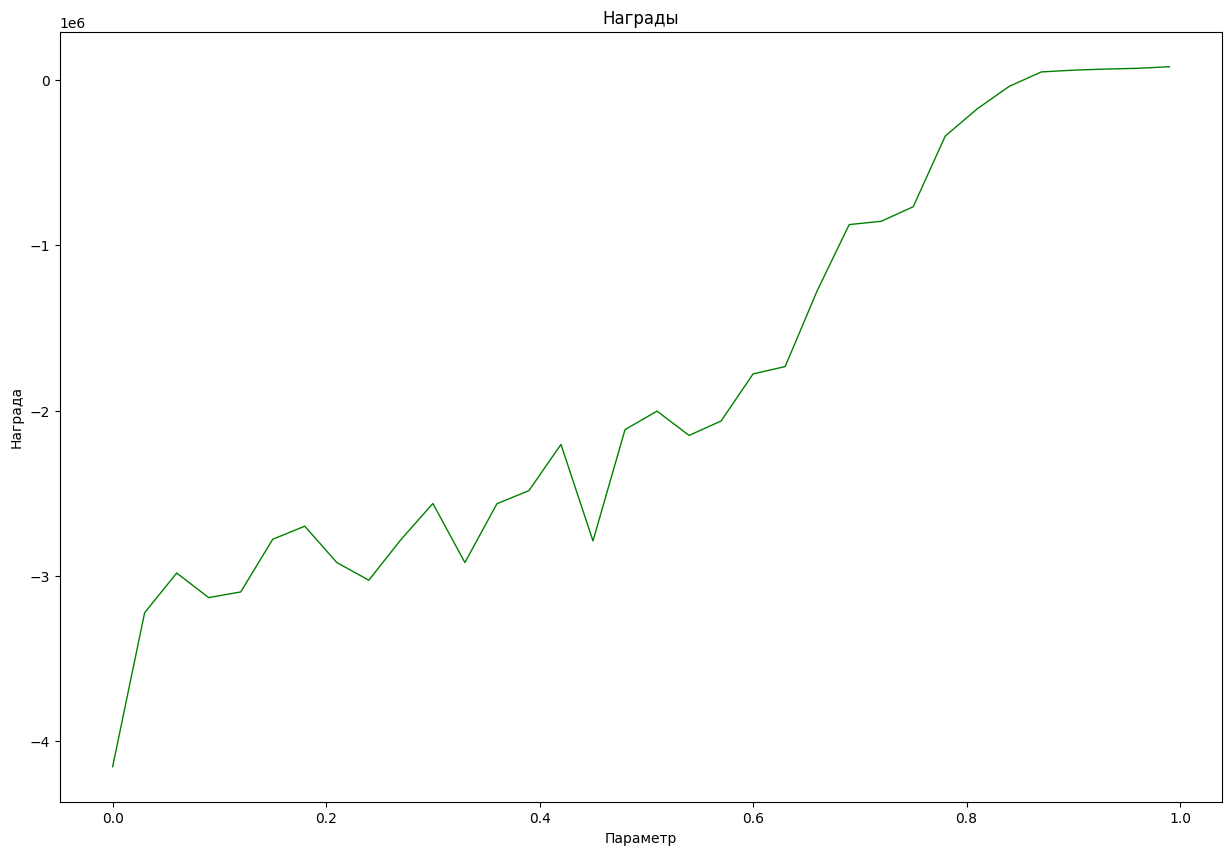

[14550, -32047, -118366, -251664, -443000, -700791, -1089008, -1623286, -2370200]
[-4158355, -203561, -48217, 7654, 28020, 39510, 56978, 68952, 71089, 65985, 71792, 78021, 73888, 69373, 70056, 66523, 70566, 52782, 67558, 54579, 57249, 54539, 21029, 26283, 7128, -6524, -26331, -51433, -68419, -106323, -174996, -250826, -420599, -850922]
[-4155659, -3223361, -2983249, -3131945, -3097736, -2778786, -2699791, -2919729, -3026740, -2781549, -2562360, -2919825, -2563910, -2484437, -2204759, -2788886, -2115118, -2003319, -2150385, -2063025, -1777894, -1733738, -1274876, -874220, -854210, -766097, -338111, -173239, -37136, 49825, 60626, 67228, 71679, 81359]
Best params: eps=0.1, lr=0.32999999999999996, gamma=0.99


In [12]:
bruteforce_sarsa()

# SARSA: eps=0.1, lr=0.33, gamma=0.99, num_episodes=20000

100%|██████████| 20000/20000 [00:10<00:00, 1979.79it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[ 0.          0.          0.          0.          0.          0.        ]
 [-2.61052784 -2.64154913 -6.10348968 -0.99542035  3.10580089 -7.86833146]
 [-0.80195019  3.57042242  0.74173644  2.09522323  9.56645827 -4.881662  ]
 ...
 [-2.42725745 -1.97717651 -2.48997284  3.63590283 -3.9        -3.9       ]
 [-2.14656885 -1.99469214 -2.15957614  1.38633056 -6.279      -9.3535425 ]
 [-0.6279     -0.769353   -0.6279     17.53299361 -6.279      -6.420453  ]]


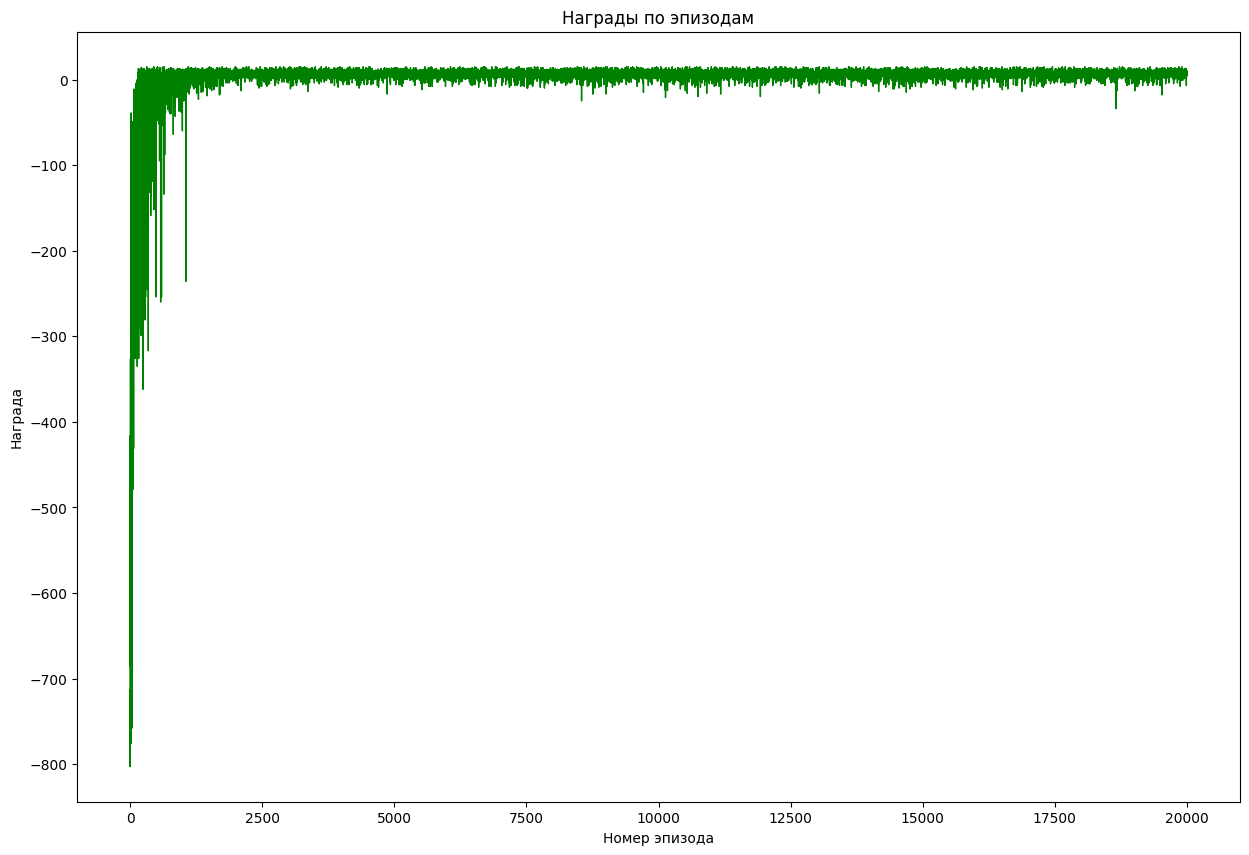

In [13]:
run_sarsa()